In [1]:
import numpy as np
import pandas as pd

from google.colab import drive

drive.mount("/content/drive")
df=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Datasets/electronics_product.csv"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"


In [3]:
df.drop(["name","sub_category","image","link","Unnamed: 0"],axis=1,inplace=True)

In [4]:
df["actual_price"] = df["actual_price"].str.replace('₹', '').str.replace(',', '').str.replace('.', '').fillna(0).astype(int)
df["discount_price"] = df["discount_price"].str.replace('₹', '').str.replace(',', '').str.replace('.', '').fillna(0).astype(int)
df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"].str.replace('[^0-9]', '', regex=True), errors='coerce').fillna(0).astype(float)


<ipython-input-4-a37f4b484e88>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["actual_price"] = df["actual_price"].str.replace('₹', '').str.replace(',', '').str.replace('.', '').fillna(0).astype(int)
<ipython-input-4-a37f4b484e88>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["discount_price"] = df["discount_price"].str.replace('₹', '').str.replace(',', '').str.replace('.', '').fillna(0).astype(int)


In [5]:
df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_category   9600 non-null   object 
 1   ratings         9481 non-null   float64
 2   no_of_ratings   9600 non-null   float64
 3   discount_price  9600 non-null   int64  
 4   actual_price    9600 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 375.1+ KB


In [7]:
df.isnull().any()

main_category     False
ratings            True
no_of_ratings     False
discount_price    False
actual_price      False
dtype: bool

In [8]:
df["ratings"]=df["ratings"].fillna(0)


In [9]:
df["discount_price"].describe()

count      9600.000000
mean       3508.303854
std       15454.439843
min           0.000000
25%         278.000000
50%         539.000000
75%        1549.000000
max      879899.000000
Name: discount_price, dtype: float64

In [10]:
df.drop(df[df['discount_price']>df["actual_price"]].index,axis=0,inplace=True)

In [11]:
df["main_category"].describe()

count                    9503
unique                      1
top       tv, audio & cameras
freq                     9503
Name: main_category, dtype: object

In [12]:
df.drop(["main_category"],inplace=True,axis=1)

In [13]:
df["actual_price"].describe()

count    9.503000e+03
mean     5.990989e+03
std      6.731236e+04
min      0.000000e+00
25%      7.990000e+02
50%      1.490000e+03
75%      3.400000e+03
max      6.059807e+06
Name: actual_price, dtype: float64

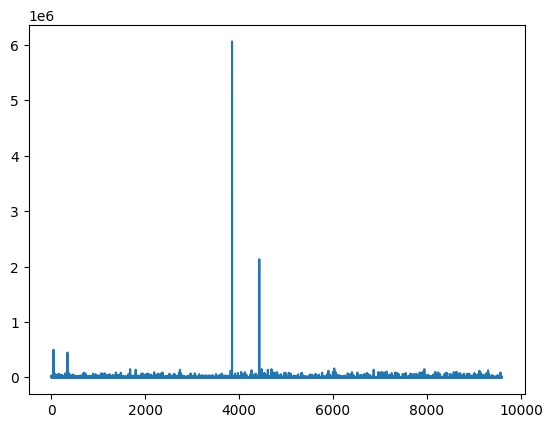

In [14]:
import matplotlib.pyplot as plt
plt.plot(df["actual_price"])


In [15]:
df.drop(df[df["actual_price"]>100000].index,axis=0)

,ratings,no_of_ratings,discount_price,actual_price
0,4.0,965.0,10999,18999
1,4.3,113956.0,18999,19999
2,4.2,90304.0,1999,2299
3,4.1,24863.0,15999,24999
4,4.3,113956.0,18999,19999
...,...,...,...,...
9595,4.1,37.0,1710,2491
9596,4.2,1133.0,475,1999
9597,3.5,3177.0,962,3999
9598,3.6,210.0,400,1000


In [16]:
df.drop(df[df["actual_price"]<100].index,axis=0,inplace=True)

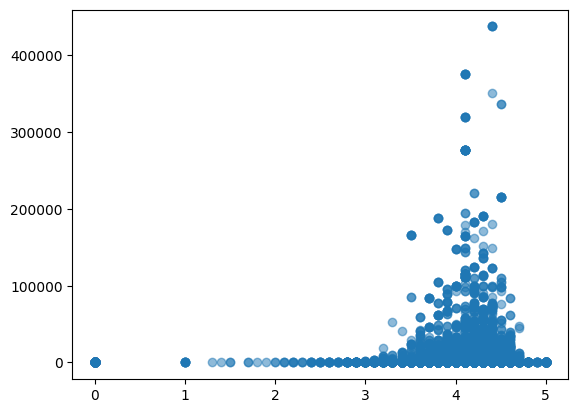

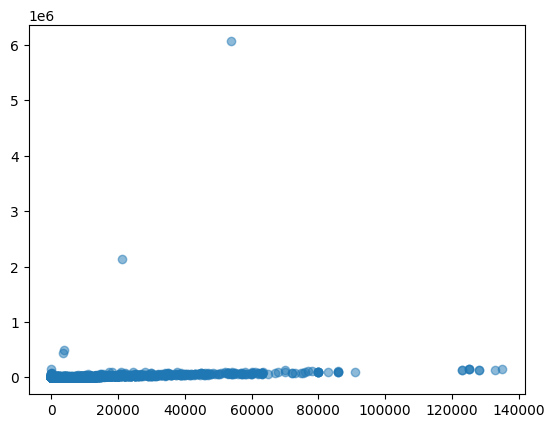

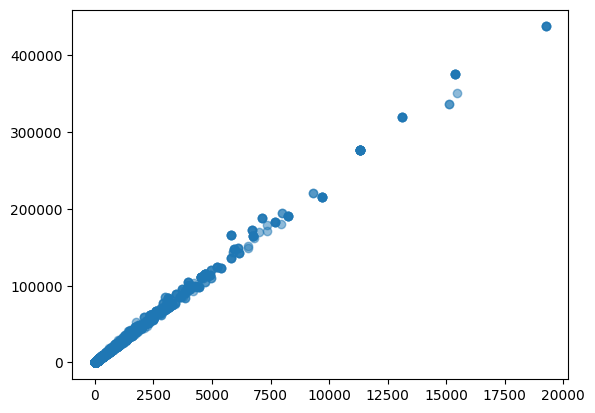

In [23]:

plt.scatter(df["ratings"],df["no_of_ratings"],alpha=0.5)
plt.show()
plt.scatter(df["discount_price"],df["actual_price"],alpha=0.5)
plt.show()
plt.scatter(df["rating_margin"],df["no_of_ratings"],alpha=0.5)
plt.show()

In [18]:
df["a/d ratio"]=df["actual_price"]/(df["discount_price"]+1)

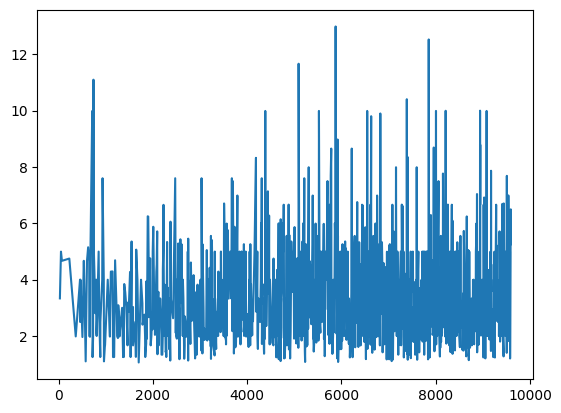

In [43]:
plt.plot(df["a/d ratio"])

In [20]:
df.head()

,ratings,no_of_ratings,discount_price,actual_price,a/d ratio
0,4.0,965.0,10999,18999,1.727182
1,4.3,113956.0,18999,19999,1.052579
2,4.2,90304.0,1999,2299,1.149500
3,4.1,24863.0,15999,24999,1.562437
4,4.3,113956.0,18999,19999,1.052579


In [21]:
df["rating_margin"]=df["ratings"]*df["no_of_ratings"]/100

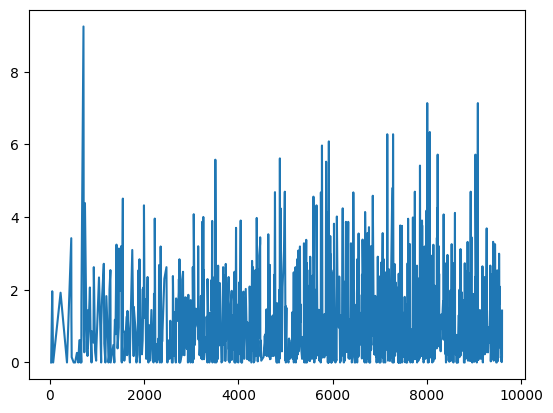

In [42]:
plt.plot(df["rating_margin"])

In [24]:
df.shape


(9386, 6)

In [25]:
df.drop(df[df["a/d ratio"]>13].index,axis=0,inplace=True)

In [26]:
df.drop(df[df["rating_margin"]>10000].index,axis=0,inplace=True)

In [27]:
df["a/d ratio"].describe()

count    8945.000000
mean        2.672170
std         1.485706
min         1.000000
25%         1.584674
50%         2.282857
75%         3.330000
max        12.990000
Name: a/d ratio, dtype: float64

In [28]:
df["rating_margin"].describe()

count    8945.000000
mean      323.609108
std       881.470770
min         0.000000
25%         8.466000
50%        44.042000
75%       200.466000
max      9688.995000
Name: rating_margin, dtype: float64

In [29]:
df["rating/money"]=df["rating_margin"]/df["a/d ratio"]

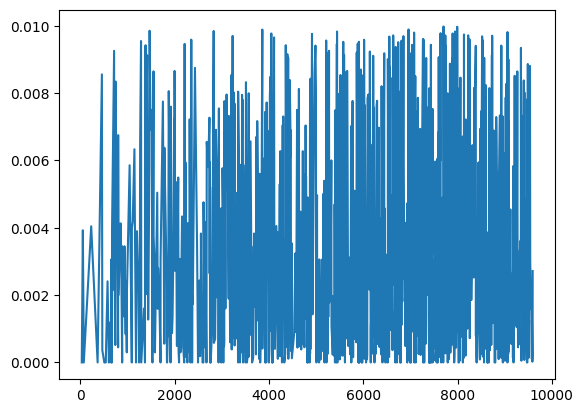

In [55]:
plt.plot(df["rating/money"])

In [60]:
df["rating/money"]=df["rating/money"]/10
df["rating/money"].describe()

count    1265.000000
mean        0.333142
std         0.297149
min         0.000000
25%         0.076577
50%         0.246997
75%         0.555442
max         0.997666
Name: rating/money, dtype: float64

In [32]:
df.drop(df[df["rating/money"]>1].index,axis=0,inplace=True)

In [57]:
df["rating/money"]=df["rating/money"]/100

In [34]:
df.head()

,ratings,no_of_ratings,discount_price,actual_price,a/d ratio,rating_margin,rating/money
29,0.0,0.0,1499,4999,3.332667,0.00,0.000000
52,3.5,56.0,1599,7990,4.993750,1.96,0.003925
72,0.0,0.0,4499,21000,4.666667,0.00,0.000000
229,4.0,48.0,399,1899,4.747500,1.92,0.004044
365,0.0,0.0,165,329,1.981928,0.00,0.000000


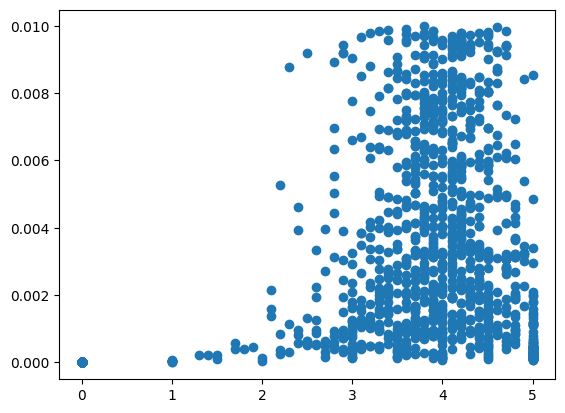

In [35]:
plt.scatter(df["ratings"], df["rating/money"])
plt.show()

In [66]:
X=df.drop(["rating/money"],axis=1)
Y=df["rating/money"]

In [67]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.2,random_state=10)


In [68]:
# model=SVR(kernel="linear")
model=KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [69]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [70]:
df2 = pd.DataFrame({"mse": [mse], "r2": [r2]})
df2

,mse,r2
0,0.068731,0.235166


In [77]:
pd.DataFrame({"pred":y_pred,"actual":y_test})

,pred,actual
465,0.220256,0.036311
7083,0.291781,0.000000
3998,0.245221,0.000000
8502,0.328676,0.025019
3239,0.456051,0.553799
...,...,...
9212,0.455208,0.851233
9059,0.197820,0.000000
8245,0.244306,0.264264
6594,0.352116,0.122911
